# Libraries & Global variables

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import cv2
import json
import joblib

import os
import time

# from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2
import FusionModel_tools as fm
import importlib
importlib.reload(fm)

# import nltk
# nltk.download('popular', quiet = True)


<module 'FusionModel_tools' from 'C:\\Ramiro\\Data Science\\0_DataScientest\\02_DS_project\\Raku_ten_23\\FusionModel_tools.py'>

In [2]:
## define general parameters

myseed = 123

splitting_path = '../Splitted_datasets/'
preprocessing_path = '../Preprocessed_data/'
training_path = '../Trained_models_and_metrics/'
base_img_path = '../Base_models/Image/'

# Reloading datasets: 
**Chose at which stage the dataset is goind to be imported:**
* Raw data after train - test splitting.  
* Preprocessed datasets after cleaning and feature engineering.  
* Transformed datasets into np.arrays and/or sparce matrices ready to feed into the ML models

## Option_1: Raw datasets after train - test spliting

In [4]:
# df_X_train = pd.read_csv(splitting_path + '2308141811_df_X_train.csv', index_col = 0, header = 0)
# df_X_test = pd.read_csv(splitting_path + '2308141811_df_X_test.csv', index_col = 0, header = 0)
df_y_train = pd.read_csv(splitting_path + '2308141811_df_y_train.csv', index_col = 0, header = 0)
df_y_test = pd.read_csv(splitting_path + '2308141811_df_y_test.csv', index_col = 0, header = 0)

In [4]:
# print(df_X_train.index)
# df_X_train.head()

In [5]:
# print(df_X_test.index)
# df_X_test.head()

In [6]:
# print(df_y_train.index)
# df_y_train.head()

In [7]:
# print(df_y_test.index)
# df_y_test.head()

## Option_2: preprocessed dataset after feature engineering
Include target dataset if not imported before.

In [162]:
# df_X_train_preprocess = pd.read_csv(preprocessing_path+'2308141824_df_X_train_preprocess.csv', header = 0, index_col = 0, sep = ',')
# df_X_test_preprocess = pd.read_csv(preprocessing_path+'2308141824_df_X_test_preprocess.csv', header = 0, index_col = 0, sep = ',')
# df_y_train = pd.read_csv( splitting_path+'2308141811_df_y_train.csv', header = 0, index_col = 0, sep = ',')
# df_y_test = pd.read_csv( splitting_path+'2308141811_df_y_test.csv', header = 0, index_col = 0, sep = ',')

In [9]:
# print(df_X_train_preprocess.index)
# df_X_train_preprocess.head()

In [10]:
# print(df_X_test_preprocess.index)
# df_X_test_preprocess.head()

## Option_3: Transformed data, ready to feed into the ML models
Uncomment cells below to verify consistency of the imported datasets or the properties of the associated transformers

**Features**

In [3]:
# from scipy import sparse

# text_data = {}

# text_data['X_train'] = sparse.load_npz("../Preprocessed_data/2308141825_text_data_transformed_X_train.npz")
# text_data['X_test'] = sparse.load_npz("../Preprocessed_data/2308141825_text_data_transformed_X_test.npz")

In [4]:
# print(text_data['X_train'].shape)
# text_data['X_train'].toarray()[14,:25]

In [5]:
# print(text_data['X_test'].shape)
# text_data['X_test'].toarray()[14,:25]

**Targets**

In [4]:
# targets = {}
# targets['y_train'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_train.npy")
# targets['y_test'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_test.npy")

In [15]:
# print(targets['y_train'].shape)
# print(targets['y_train'][:5,:])
# print(targets['y_train'][:5,:].argmax(axis = 1))

In [16]:
# print(targets['y_test'].shape)
# print(targets['y_test'][:5,:])
# print(targets['y_test'][:5,:].argmax(axis = 1))

**Transformers**

In [5]:
# token_len_scaler = joblib.load("../Preprocessed_data/2308141825_token_len_scaler")
# language_encoder = joblib.load("../Preprocessed_data/2308141825_language_encoder")
# lemmas_vectorizer = joblib.load("../Preprocessed_data/2308141825_lemmas_vectorizer")
target_encoder = joblib.load("../Preprocessed_data/2308141825_target_encoder")

In [18]:
# print(token_len_scaler.data_min_)
# print(token_len_scaler.data_max_)
# print(token_len_scaler.scale_)
# print(token_len_scaler.n_features_in_)
# print(token_len_scaler.n_samples_seen_)
# print(token_len_scaler.feature_names_in_)

In [19]:
# print(language_encoder.categories_)
# print(language_encoder.n_features_in_)
# print(language_encoder.feature_names_in_)

In [20]:
# print(len(lemmas_vectorizer.vocabulary_),'\n')
# print(dict(list(lemmas_vectorizer.vocabulary_.items() )[:25]),'\n' )
# print(list(lemmas_vectorizer.stop_words_)[:25])

In [21]:
# print(target_encoder.classes_)

## image data preprocessed
Computed for each item in "df_X_train_preprocess" and "df_X_test_preprocess".  
So indexes belong to these dataframes

In [5]:
image_train_preprocess = np.load("../Preprocessed_data/2308141850_df_image_train_preprocess.npy")
image_test_preprocess = np.load("../Preprocessed_data/2308141850_df_image_test_preprocess.npy")

In [5]:
print(image_train_preprocess.shape)
print(image_train_preprocess[0,:50])

(67932, 30000)
[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 251 255 254 255 248 255
  48  42  99  50  44 115  57  52 121  45  41 107  39  41]


In [46]:
# ## train images idexes
# print(list(df_X_train_preprocess.index)[:50])

[9263, 50884, 73788, 34901, 81204, 26065, 46256, 70161, 24947, 32350, 38334, 13255, 74781, 26466, 67566, 62073, 10878, 78873, 54625, 72433, 19434, 31164, 64340, 11740, 16505, 26723, 46990, 27898, 13313, 10332, 8445, 36349, 44167, 44392, 79117, 19289, 7975, 1532, 45923, 42445, 31657, 17914, 29574, 44309, 51061, 46774, 41479, 31, 30602, 78871]


In [45]:
# print(image_test_preprocess.shape)
# print(image_test_preprocess[3535,:50])

(16984, 30000)
[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 253 255 255 255 255 251
 116 136 161  94 124 159  90 117 151  95 116 147  76 103]


In [47]:
# ## train images idexes
# print(list(df_X_test_preprocess.index)[:50])

[76291, 35651, 23689, 27954, 53964, 25569, 462, 76121, 81032, 80184, 55236, 37176, 39826, 38238, 71212, 19785, 8964, 84720, 24405, 30751, 81304, 6922, 67037, 46196, 79995, 27693, 45397, 7546, 38960, 63984, 20123, 25096, 5784, 42674, 10532, 27063, 25947, 78713, 21406, 61376, 71897, 75174, 38954, 50284, 8624, 81739, 78115, 78261, 68455, 56559]


## image data transformed

In [3]:
# t0 = time.time()

# image_train_transformed = np.load("../Preprocessed_data/2308141953_image_train_transformed.npz")['array']
# image_test_transformed = np.load("../Preprocessed_data/2308141953_image_test_transformed.npz")['array']

# t1 = time.time()
# print("Loading arrays takes %0.2f seconds" %(t1-t0))

Loading arrays takes 51.21 seconds


In [52]:
# print(image_train_transformed.shape)
# print(image_train_transformed[0,0,:50,0])

(67932, 100, 100, 3)
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.98431373 1.
 0.18823529 0.19607843 0.22352941 0.17647059 0.15294118 0.14509804
 0.16862745 0.18431373 0.17254902 0.15686275 0.18431373 0.21568627
 0.22352941 0.21176471 0.21176471 0.17254902 0.24705882 0.23529412
 0.19215686 0.17647059 0.21176471 0.22352941 0.19215686 0.21960784
 0.20392157 0.2627451  0.23529412 0.23921569 0.23921569 0.23137255
 0.28235294 0.30980392 0.33333333 0.28627451 0.28627451 0.28627451
 0.25490196 0.23137255]


In [54]:
# print(image_test_transformed.shape)
# print(image_test_transformed[0,0,:50,0])

(16984, 100, 100, 3)
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99607843
 1.         0.98431373 0.85098039 0.79607843 0.80784314 0.80784314
 0.80784314 0.80784314 0.80784314 0.80784314 0.80784314 0.80784314
 0.80784314 0.80784314 0.80784314 0.80784314 0.80784314 0.80784314
 0.80784314 0.80392157 0.80392157 0.80392157 0.80784314 0.80392157
 0.8        0.79607843]


## product categories

In [7]:
product_class = pd.read_csv('../datasets/product_class.csv', sep = ';')
print(product_class.shape)
product_class.head()

(27, 3)


,target,prdtypecode,prodtype
0,0,10,livres_adulte
1,24,40,jeux_videos_import
2,25,50,accessoires_jeux_videos
3,26,60,jeux_et_consoles_retro
4,1,1140,goodies_geek


# Image Models

In [6]:
from datetime import date, datetime

def date_time():
    '''
    get date and time in string format '_yymmdd_hhmm'
    at the moment the function is called.
    '''
    from datetime import date, datetime
    
    
    today = date.today()
    now = datetime.now() 

    return today.strftime("%Y%m%d")[2:] + now.strftime("%H%M")

# Random Forest

In [161]:
del XX_train, image_train_transformed, XX_test, image_test_transformed, yy_train, targets['y_train'], yy_test, targets['y_test']

In [164]:
X_train = image_train_preprocess / 255
X_test = image_test_preprocess / 255

y_train = df_y_train.squeeze()
y_test = df_y_test.squeeze()

In [12]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## estimator
rf_clf = RandomForestClassifier(n_jobs = -1, random_state = 123) # max_depth = 20, 

## GridSearch
# params = {'max_depth' : [8,10,12,15,20,30]} 

# grid_rf = GridSearchCV(estimator = rf_clf, param_grid = params, scoring = 'accuracy', n_jobs = -1,\
#                        return_train_score=True, verbose = 2, cv = 4)

## training (timed)
t0 = time.time()

rf_clf.fit(X_train, y_train)
# grid_rf.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

model_date_time = date_time()
print(model_date_time)

For 67932 observations, training time = 332.44 seconds
2308182008


In [21]:
rf_clf.get_params()
# grid_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [24]:
## maximum tree depth in the forest
max((e.tree_.max_depth for e in rf_clf.estimators_))

72

**Grid optimization**

In [51]:
## Best estimators
print("Best estimator:", grid_rf.best_params_)


## Grid evaluation:
to_display = ['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']
grid_rf_optimization = pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:,to_display]
#print(grid_rf_optimization)


## export grid_cv_results
export = False
time_stamp = model_date_time
if export:
    filename = training_path + time_stamp + '_grid_rf_cv_results' + '.csv'
    pd.DataFrame.from_dict(grid_rf.cv_results_).to_csv(filename, header=True, index=False)
    print(filename)

Best estimator: {'max_depth': 90}
../Trained_models_and_metrics/20230814_2159_grid_rf_cv_results.csv


In [45]:
## Formating into dataframe: 

for key in params.keys():
    grid_rf_optimization[key] = [val[key] for val in grid_rf_optimization['params']]

#grid_rf_optimization = grid_rf_optimization.drop('params', axis = 1)

grid_rf_optimization

,params,mean_test_score,std_test_score,mean_train_score,std_train_score,max_depth
0,{'max_depth': 60},0.705191,0.003330,0.828829,0.001555,60
1,{'max_depth': 70},0.713066,0.002463,0.845562,0.000962,70
2,{'max_depth': 80},0.717718,0.001581,0.859179,0.000241,80
3,{'max_depth': 90},0.722620,0.001851,0.872578,0.001564,90


**Plot optimization of current model**

Text(0.5, 0.98, 'Optimization: Random Forest on meanRGB')

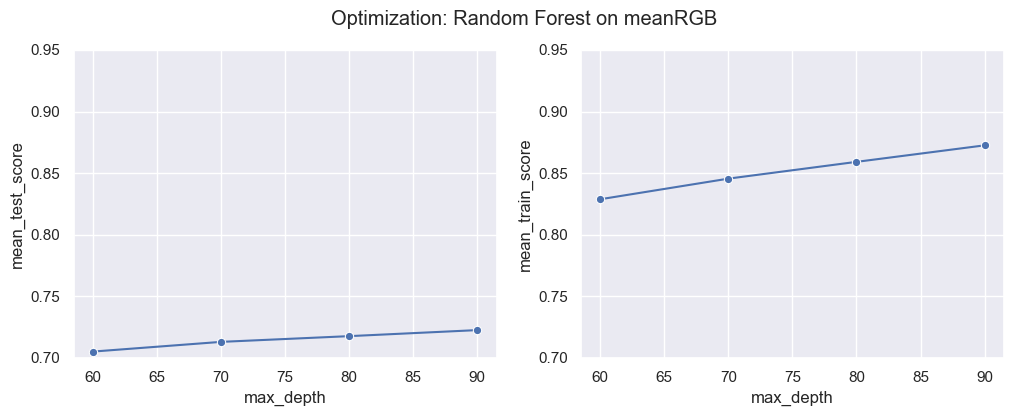

In [48]:
fig, axs = plt.subplots(1,2,figsize = (12,4))
#sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, hue = 'criterion', style='max_features', marker = 'o')


sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, \
             marker = 'o', ax= axs[0])

# sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_v0, hue = 'C',\
#              marker = '*', ax= axs[0], ls = ':', palette="crest")


sns.lineplot(x = 'max_depth', y='mean_train_score', data = grid_rf_optimization, \
             marker = 'o', ax= axs[1])

# sns.lineplot(x = 'max_depth', y='mean_train_score', data = grid_rf_v0, hue = 'C',\
#              marker = '*', ax= axs[1], ls = ':', palette="crest")

for ax in axs:
    ax.set_ylim(0.7,0.95)
#     ax.set_xscale("log")
#     leg = ax.legend()
#     leg_lines = leg.get_lines()
# #     leg_lines[1].set_linestyle(":")
#     leg_lines[2].set_linestyle(":")
#     leg_lines[3].set_linestyle(":")
    
#plt.legend(title='Day of Week')
# plt.legend(labels = ['a', 'F', 'S', 'y'])
fig.suptitle("Optimization: Random Forest on meanRGB")

**Train-Test accuracy**

In [167]:
t0 = time.time()

# rf_accuracy_train = rf_clf.score(X_train, y_train)
# rf_accuracy_train = grid_rf.score(X_train, y_train)

t1 = time.time()

rf_accuracy_test = rf_clf.score(X_test, y_test)
# rf_accuracy_test = grid_rf.score(X_test, y_test)

t2 = time.time()


# print("Train set accuracy %0.3f. Done in %0.2f seconds." % (rf_accuracy_train,(t1-t0)) )
print("Test  set accuracy %0.3f. Done in %0.2f seconds." % (rf_accuracy_test,(t2-t1)) )

Test  set accuracy 0.448. Done in 2.56 seconds.


**Predictions**

In [179]:
t0 = time.time()
y_pred = rf_clf.predict(X_test)
# y_pred = grid_rf.predict(X_test)
t1 = time.time()

print("Predictions done in %0.2f seconds" %(t1-t0))

Predictions done in 2.53 seconds


In [180]:
categories = product_class['prdtypecode'].tolist()

yy_pred = pd.Categorical(y_pred, categories = categories)
yy_test = pd.Categorical(y_test, categories = categories)

cm = pd.crosstab(yy_test, yy_pred, rownames=['Reality'], colnames=['Predictions'], dropna = False)

(27, 27)


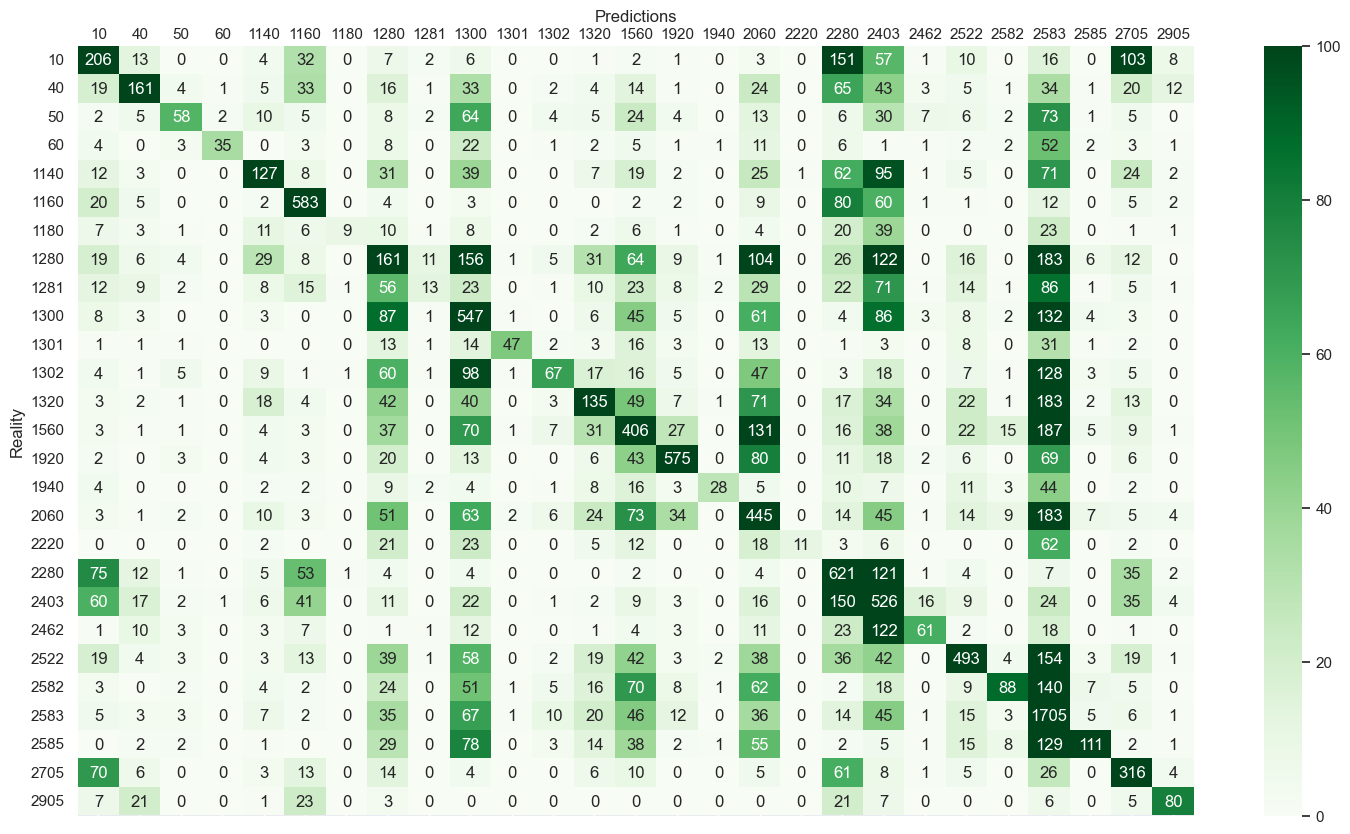

In [181]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')

**Save confusion matrix**

In [31]:
export = False

if export:
    filename = base_img_path + model_date_time + '_img_rf' + '_confusionMatrix.csv'
    
    cm.to_csv(filename, header = True, index = True)
    print(filename)

../Base_models/Image/2308182008_img_rf_confusionMatrix.csv


**Classification Report: macro & micro**

In [182]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

In [183]:
cr_rf_txt = classification_report(y_test, y_pred)
print(cr_rf_txt)

              precision    recall  f1-score   support

          10       0.36      0.33      0.35       623
          40       0.56      0.32      0.41       502
          50       0.57      0.17      0.27       336
          60       0.90      0.21      0.34       166
        1140       0.45      0.24      0.31       534
        1160       0.68      0.74      0.70       791
        1180       0.75      0.06      0.11       153
        1280       0.20      0.17      0.18       974
        1281       0.35      0.03      0.06       414
        1300       0.36      0.54      0.43      1009
        1301       0.85      0.29      0.44       161
        1302       0.56      0.13      0.22       498
        1320       0.36      0.21      0.26       648
        1560       0.38      0.40      0.39      1015
        1920       0.80      0.67      0.73       861
        1940       0.76      0.17      0.28       161
        2060       0.34      0.45      0.38       999
        2220       0.92    

**or reload classification report**

In [63]:
micro_rf = pd.read_csv(base_img_path + '2308191608_img_rf_micro_classificationReport.csv', header = 0, index_col = 0)
micro_rf = micro_rf.astype({'prdtypecode': 'str'})
micro_rf

,prdtypecode,precision,recall,f1-score,support
0,10,0.362039,0.330658,0.345638,623.0
1,40,0.557093,0.320717,0.407080,502.0
2,50,0.574257,0.172619,0.265446,336.0
3,60,0.897436,0.210843,0.341463,166.0
4,1140,0.451957,0.237828,0.311656,534.0
5,1160,0.675550,0.737042,0.704958,791.0
6,1180,0.750000,0.058824,0.109091,153.0
7,1280,0.200999,0.165298,0.181408,974.0
8,1281,0.351351,0.031401,0.057650,414.0
9,1300,0.359396,0.542121,0.432240,1009.0


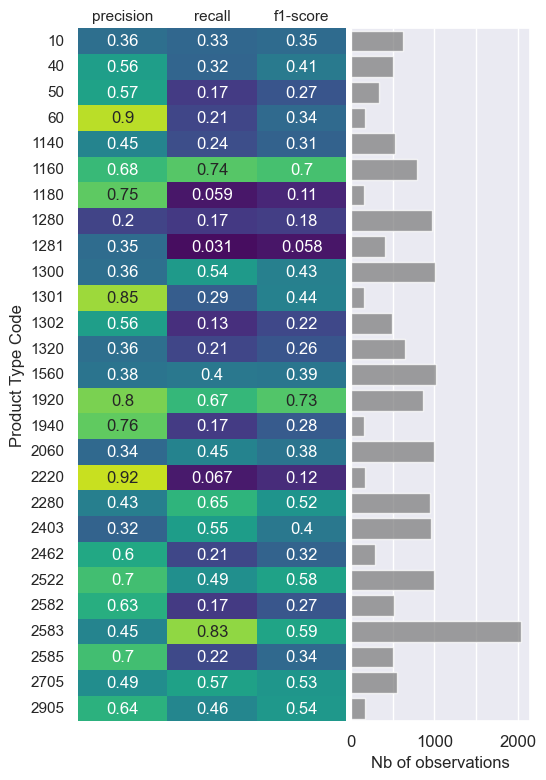

In [64]:
import FusionModel_tools as fm

fm.plot_classificationReport(micro_rf)

**Top Classified Categories**

In [185]:
micro_rf.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
14,1920,0.799722,0.667828,0.727848,861.0
5,1160,0.675550,0.737042,0.704958,791.0
23,2583,0.451297,0.834966,0.585911,2042.0
21,2522,0.695346,0.493988,0.577622,998.0
26,2905,0.640000,0.459770,0.535117,174.0


**Worst Classified Categories**

In [186]:
micro_rf.sort_values(by = 'f1-score', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
8,1281,0.351351,0.031401,0.057650,414.0
6,1180,0.750000,0.058824,0.109091,153.0
17,2220,0.916667,0.066667,0.124294,165.0
7,1280,0.200999,0.165298,0.181408,974.0
11,1302,0.558333,0.134538,0.216828,498.0


**Less represented categories scores**

In [187]:
micro_rf.sort_values(by = 'support', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.750000,0.058824,0.109091,153.0
10,1301,0.854545,0.291925,0.435185,161.0
15,1940,0.756757,0.173913,0.282828,161.0
17,2220,0.916667,0.066667,0.124294,165.0
3,60,0.897436,0.210843,0.341463,166.0


**Save Classification Report**

In [38]:
export = True

if export:
    filename = base_img_path + model_date_time +'_img_rf' + '_classificationReport.txt'
    
    with open(filename, 'w') as file:
        file.write(classification_report(y_test, y_pred))
        print(filename)

../Base_models/Image/2308182008_img_rf_classificationReport.txt


In [188]:
export = True

%load_ext autoreload
%autoreload 2
import FusionModel_tools as fm
# import importlib
# importlib.reload(fm)

if export:
    fm.save_model_metrics(cr_rf_txt, metric_type = 'classificationReport_txt', 
                                   model_name = 'img_rf', 
                                   path = base_img_path , 
                                   timestamp = model_date_time )

    fm.save_model_metrics(micro_rf, metric_type = 'classificationReport_df', 
                                   model_name = 'img_rf_micro', 
                                   path = base_img_path , 
                                   timestamp = model_date_time )

    fm.save_model_metrics(macro_rf, metric_type = 'classificationReport_df', 
                                   model_name = 'img_rf_macro', 
                                   path = base_img_path , 
                                   timestamp = model_date_time )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
../Base_models/Image/2308191608_img_rf_classificationReport.txt
../Base_models/Image/2308191608_img_rf_micro_classificationReport.csv
../Base_models/Image/2308191608_img_rf_macro_classificationReport.csv


**Save / Load trained model ready to use**

In [158]:
save = False
reload = True

from joblib import dump, load

if save:
    saved_model = base_img_path + model_date_time +'_img_rf_trained' + '.joblib'
    
    dump(rf_clf, saved_model) #
    print("Saved trained model:", saved_model)

if reload:
    saved_model = base_img_path + '2308182008_img_rf_trained' + '.joblib'
    
    svc_clf=load(saved_model)
    print("reloaded model: ", saved_model)

reloaded model:  ../Base_models/Image/2308182008_img_rf_trained.joblib


# Support Vectors Machine - SVC

In [7]:
X_train = image_train_preprocess # / 255
X_test = image_test_preprocess #/ 255

y_train = df_y_train.squeeze()
y_test = df_y_test.squeeze()

In [8]:
type(X_train[0,0])
# X_train.shape

numpy.uint8

In [9]:
## split dataset into two part if needed. Try to train in two steps.

from sklearn.model_selection import train_test_split

X_train_p1, X_train_p2, y_train_p1, y_train_p2 = train_test_split(X_train, y_train, test_size = 0.5, \
                                                                  random_state = myseed, stratify = y_train)


In [10]:
print(type(X_train_p1))
print(X_train_p1.shape)
print(type(X_train_p1[0,0]))

print(type(X_train_p2))
print(X_train_p2.shape)
print(type(X_train_p2[0,0]))

<class 'numpy.ndarray'>
(33966, 30000)
<class 'numpy.uint8'>
<class 'numpy.ndarray'>
(33966, 30000)
<class 'numpy.uint8'>


In [29]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

## estimator
# svc_clf = svm.SVC(C = 10, kernel = 'rbf', gamma=1e-9) #kernel = 'poly', gamma = 0.01
# svc_clf = svm.SVC(random_state = 123) #kernel = 'poly', gamma = 0.01

## GridSearch
# params = {'gamma' : [1e-11,1e-10,1e-9,1e-8,1e-7,1e-6]}#,
# #          'C' : [1e3,1e4,1e5,1e6] }

# grid_svc = GridSearchCV(estimator = svc_clf, param_grid = params, scoring = 'accuracy', n_jobs = -1, cv = 3,\
#                           return_train_score=True, verbose = 3)

## training (timed)
t0 = time.time()

svc_clf.fit(X_train_p2, y_train_p2)
# grid_svc.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train_p2.shape[0], (t1-t0) ) )

model_date_time = date_time()
print(model_date_time)

For 33966 observations, training time = 17868.24 seconds
2308162106


In [16]:
# my_model.get_params()
svc_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 123,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Grid optimization evaluation**

In [ ]:
## Best estimators
print("Best estimator:", grid_svc.best_params_)


## Grid evaluation:
to_display = ['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']
grid_svc_optimization = pd.DataFrame.from_dict(grid_svc.cv_results_).loc[:,to_display]


## export grid_cv_results
export = True
time_stamp = model_date_time
if export:
    filename = 'grid_svc_cv_results' + time_stamp + '.csv'
    pd.DataFrame.from_dict(grid_svc.cv_results_).to_csv(filename, header=True, index=False)
    print(filename)

In [ ]:
## Formating into dataframe: 

for key in params.keys():
    grid_svc_optimization[key] = [val[key] for val in grid_svc_optimization['params']]

#grid_svc_optimization = grid_svc_optimization.drop('params', axis = 1)

grid_svc_optimization

**Compare to previous models ?**

In [ ]:
### load params from previous model for comparison (or skip)

grid_svc_v0 = pd.read_csv('grid_svc_cv_results_20230801_1553.csv')

import json

for key in ['C','gamma']:
#for key in params.keys():
    print(key)
    grid_svc_v0[key] = [json.loads(val.replace("'",'"'))[key] for val in grid_svc_v0['params']]

grid_svc_v0

**Plot Optimization of current model**

In [ ]:
fig, axs = plt.subplots(1,2,figsize = (12,4))
#sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, hue = 'criterion', style='max_features', marker = 'o')


sns.lineplot(x = 'gamma', y='mean_test_score', data = grid_svc_optimization,\
             marker = 'o', ax= axs[0], label = 'C=10, large dataset')

# sns.lineplot(x = 'gamma', y='mean_test_score', data = grid_svc_v0, hue = 'C',\
#              marker = '*', ax= axs[0], ls = ':', palette="crest")



sns.lineplot(x = 'gamma', y='mean_train_score', data = grid_svc_optimization,\
             marker = 'o', ax= axs[1], label = 'C=10, large dataset')

# sns.lineplot(x = 'gamma', y='mean_train_score', data = grid_svc_v0, hue = 'C',\
#              marker = '*', ax= axs[1], ls = ':', palette="crest")

for ax in axs:
    ax.set_ylim(0,1.05)
    ax.set_xscale("log")
    leg = ax.legend()
    leg_lines = leg.get_lines()
    leg_lines[1].set_linestyle(":")
    leg_lines[2].set_linestyle(":")
    leg_lines[3].set_linestyle(":")
    
#plt.legend(title='Day of Week')
# plt.legend(labels = ['a', 'F', 'S', 'y'])
fig.suptitle("Optimization: SVM.SVC on meanRGB")

In [155]:
# fig, axs = plt.subplots(1,2,figsize = (12,4), sharey = False)

# model_A = grid_svc_optimization[grid_svc_optimization['kernel']=='linear']
# sns.lineplot(x = 'C', y='mean_test_score', data = model_A, marker = 'o', ax= axs[0])
# sns.lineplot(x = 'C', y='mean_train_score', data = model_A, marker = 'o', ax= axs[0])
# axs[0].set_title("linear kernel")

# model_B = grid_svc_optimization[grid_svc_optimization['kernel']=='rbf']
# sns.lineplot(x = 'C', y='mean_test_score', data = model_B, marker = 'o', ax= axs[1])
# sns.lineplot(x = 'C', y='mean_train_score', data = model_B, marker = 'o', ax= axs[1])
# axs[1].set_title("rbf kernel")

# for ax in axs:
#     ax.set_ylim(0,1.05)

# fig.suptitle("Optimization: SVM.SVC vectorized images")

### Single Model Evaluation

**Train-Test accuracy**

In [40]:
t0 = time.time()

# svc_accuracy_train = svc_clf.score(X_train, y_train)

t1 = time.time()

svc_accuracy_test = svc_clf.score(X_test, y_test)

t2 = time.time()
# svc_accuracy_train = grid_svc.score(X_train, y_train)
# svc_accuracy_test = grid_svc.score(X_test, y_test)


# print("Train set accuracy %0.3f done in %0.2f minutes" %(svc_accuracy_train, ((t1-t0)/60) ))
print("Test set accuracy %0.3f done in %0.2f minutes" %(svc_accuracy_test, ((t2-t1)/60) ))

Test set accuracy 0.378 done in 222.93 minutes


**Predictions**

In [41]:
t0 = time.time()

y_pred = svc_clf.predict(X_test)
#y_pred = grid_svc.predict(X_test)

t1 = time.time()
print("Done in %0.2f" %(t1-t0))

Done in 13358.89


In [44]:
categories = product_class['prdtypecode'].tolist()

yy_pred = pd.Categorical(y_pred, categories = categories)
yy_test = pd.Categorical(y_test, categories = categories)

cm = pd.crosstab(yy_test, yy_pred, rownames=['Reality'], colnames=['Predictions'], dropna = False)

(27, 27)


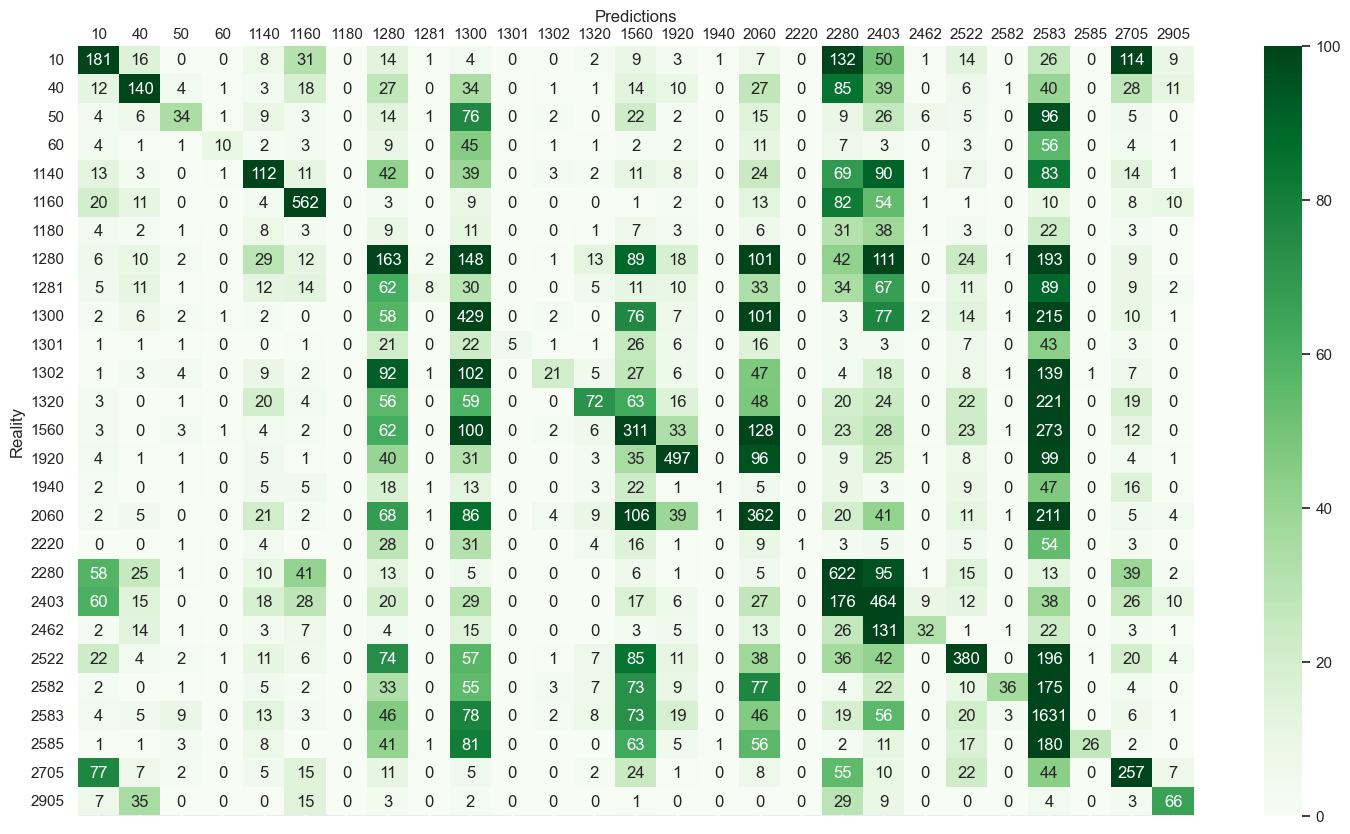

In [45]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')

**Save confusion matrix**

In [46]:
export = True

if export:
    filename = training_path + model_date_time + '_img_svc' + '_confusionMatrix.csv'
    
    with open(filename, 'w') as file:
        cm.to_csv(filename, header = True, index = True)
        print(filename)

../Trained_models_and_metrics/2308162106_img_svc_confusionMatrix.csv


**Classification Report: macro & micro**

In [48]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_svc = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_svc = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.36      0.29      0.32       623
          40       0.43      0.28      0.34       502
          50       0.45      0.10      0.17       336
          60       0.62      0.06      0.11       166
        1140       0.34      0.21      0.26       534
        1160       0.71      0.71      0.71       791
        1180       0.00      0.00      0.00       153
        1280       0.16      0.17      0.16       974
        1281       0.50      0.02      0.04       414
        1300       0.27      0.43      0.33      1009
        1301       1.00      0.03      0.06       161
        1302       0.48      0.04      0.08       498
        1320       0.47      0.11      0.18       648
        1560       0.26      0.31      0.28      1015
        1920       0.69      0.58      0.63       861
        1940       0.25      0.01      0.01       161
        2060       0.27      0.36      0.31       999
        2220       1.00    

C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

**Top Classified Categories**

In [50]:
micro_svc.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
5,1160,0.710493,0.710493,0.710493,791.0
14,1920,0.689320,0.577236,0.628319,861.0
23,2583,0.386493,0.798727,0.520920,2042.0
18,2280,0.400257,0.653361,0.496409,952.0
21,2522,0.577508,0.380762,0.458937,998.0


**Worst Classified Categories**

In [51]:
micro_svc.sort_values(by = 'f1-score', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.00,0.000000,0.000000,153.0
17,2220,1.00,0.006061,0.012048,165.0
15,1940,0.25,0.006211,0.012121,161.0
8,1281,0.50,0.019324,0.037209,414.0
10,1301,1.00,0.031056,0.060241,161.0


**Less represented categories scores**

In [52]:
micro_svc.sort_values(by = 'support', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.000,0.000000,0.000000,153.0
10,1301,1.000,0.031056,0.060241,161.0
15,1940,0.250,0.006211,0.012121,161.0
17,2220,1.000,0.006061,0.012048,165.0
3,60,0.625,0.060241,0.109890,166.0


**Save Classification Report**

In [53]:
export = True

if export:
    filename = training_path + model_date_time +'_img_svc' + '_classificationReport.txt'
    
    with open(filename, 'w') as file:
        file.write(classification_report(y_test, y_pred))
        print(filename)

../Trained_models_and_metrics/2308162106_img_svc_classificationReport.txt


C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

**reload classification report**

In [65]:
import pandas as pd

path = '../Base_models/Image/2308131415_img_svc_classificationReport_NotRounded.txt'

# Initialize empty lists to store data
data = []
columns = ["prdtypecode", "precision", "recall", "f1-score", "support"]


# Open and read the text file
with open(path, 'r') as file:
    lines = file.readlines()

    
# Process each line of the file
for line in lines:
    line = line.strip()  # Remove leading/trailing whitespace
    if line.startswith("accuracy") or line.startswith("macro avg") or line.startswith("weighted avg"):
        break  # Skip lines after summary lines
    if line and not line.startswith("precision"):  # Skip empty lines and header
        parts = line.split()
        class_name = parts[0]
        precision, recall, f1_score, support = map(float, parts[1:])
        data.append({"prdtypecode": class_name, "precision": precision, "recall": recall, "f1-score": f1_score, "support": support})

        
# Create a DataFrame from the list of dictionaries
micro_svc = pd.DataFrame(data, columns=columns)


# Display the DataFrame
micro_svc

,prdtypecode,precision,recall,f1-score,support
0,10,0.35,0.3000,0.320,623.0
1,40,0.43,0.2700,0.330,502.0
2,50,0.46,0.0980,0.160,336.0
3,60,0.80,0.0480,0.091,166.0
4,1140,0.34,0.2200,0.270,534.0
5,1160,0.76,0.6900,0.730,791.0
6,1180,0.50,0.0065,0.013,153.0
7,1280,0.15,0.1700,0.160,974.0
8,1281,0.50,0.0170,0.033,414.0
9,1300,0.27,0.4200,0.330,1009.0


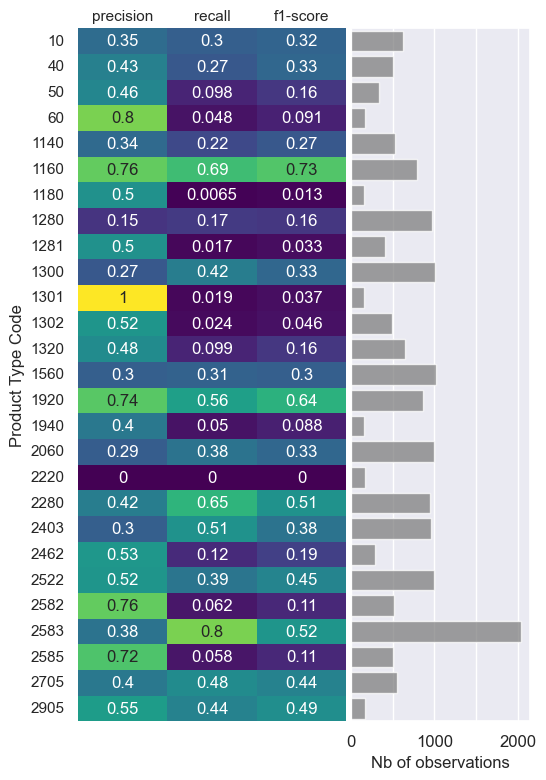

In [66]:
import FusionModel_tools as fm

fm.plot_classificationReport(micro_svc)

**Save / Load trained model ready to use**

In [ ]:
save = False
reload = False


from joblib import dump, load

if save:
    saved_model = training_path + model_date_time +'_img_svc_trained' + '.joblib'
    
    dump(svc_clf, saved_model) #
    print("Saved trained model:", saved_model)

    
if reload:
    saved_model = '../Trained_models_and_metrics/2308131415_img_svc_trained.joblib'
    
    svc_clf=load(saved_model)
    print("reloaded model: ", saved_model)

In [39]:
# svc_clf.classes_
# svc_clf.class_weight_
# svc_clf.fit_status_
# svc_clf.intercept_
# svc_clf.n_features_in_
# svc_clf.support_
# svc_clf.support_vectors_
svc_clf.shape_fit_

(33966, 30000)

# Convolution Neural Network

In [8]:
# del X_train, image_train_preprocess
# del X_test, image_test_preprocess

# del y_train, df_y_train
# del y_test, df_y_test

NameError: name 'X_train' is not defined

In [9]:
XX_train = image_train_transformed
XX_test = image_test_transformed

## target:
yy_train = targets['y_train']
yy_test = targets['y_test']

In [10]:
N_px, N_px, N_ch = XX_train.shape[1:]

### Define model : CNN layers

In [11]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D
from keras.utils import to_categorical


## data dimensions
# Nb_features = X_train.shape[1]
Nb_classes = yy_train.shape[1]


In [207]:
# ## instantiate layers

# inputs = Input(shape = (N_px, N_px, N_ch), name = "input")

# first_layer = Conv2D(filters = 32,
#                      kernel_size = (5, 5),
#                      padding = 'same',  #'valid'
#                      activation = 'relu')

# second_layer = MaxPooling2D(pool_size = (2, 2))

# third_layer = Dropout(rate = 0.4)

# fourth_layer = Flatten()

# fifth_layer = Dense(units = 256,
#                     activation = 'relu')

# output_layer = Dense(units = Nb_classes,
#                      activation='softmax')



# ## link layers & model

# x=first_layer(inputs)
# x=second_layer(x)

# x=third_layer(x)
# x=fourth_layer(x)
# x=fifth_layer(x)

# outputs=output_layer(x)


# CNN_clf = Model(inputs = inputs, outputs = outputs)

In [18]:
## instantiate layers

inputs = Input(shape = (N_px, N_px, N_ch), name = "input")

## first convolution layers
C1_layer = Conv2D(filters = 8,
                     kernel_size = (3, 3),
                     padding = 'same',  # better than 'valid'
                     activation = 'relu')

P1_layer = MaxPooling2D(pool_size = (2, 2))

## second convolution layer
C2_layer = Conv2D(filters = 32,
                     kernel_size = (5, 5),
                     padding = 'valid',  # to shrink output size a bit
                     strides = (2,2),
                     activation = 'relu')

P2_layer = MaxPooling2D(pool_size = (2, 2))

##>>> batch normalization layer ? before Dropout

Drp1_layer = Dropout(rate = 0.4)

Flt_layer = Flatten()

D1_layer = Dense(units = 512,
                    activation = 'relu')

Drp2_layer = Dropout(rate = 0.7)

D2_layer = Dense(units = 128,
                    activation = 'relu')

output_layer = Dense(units = Nb_classes,
                     activation='softmax')


## link layers & model

x=C1_layer(inputs)
x=P1_layer(x)

x=C2_layer(x)
x=P2_layer(x)

x=Drp1_layer(x)
x=Flt_layer(x)

x=D1_layer(x)
x=Drp2_layer(x)
x=D2_layer(x)

outputs=output_layer(x)


CNN_clf = Model(inputs = inputs, outputs = outputs)

**Define training process**

In [19]:
CNN_clf.compile(loss='categorical_crossentropy',
              optimizer='adam',                
              metrics=['accuracy'])

## display architecture
CNN_clf.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 8)       224       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 32)        6432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 11, 11, 32)        0   

**Train Model**

In [20]:
# EPOCHS = 10

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_filepath = './tmp_checkpoint/'
model_checkpoint_callback = ModelCheckpoint(
                                            filepath=checkpoint_filepath,
                                            verbose = 1,
                                            save_weights_only=True,
                                            monitor='val_accuracy',
                                            mode='max',
                                            save_best_only=True)

t0 = time.time()

training_history = CNN_clf.fit(XX_train, yy_train,
                              validation_split = 0.2,
                              epochs = 100,
                              batch_size = 400,
                              callbacks=[model_checkpoint_callback])

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(XX_train.shape[0], (t1-t0) ) )

CNN_clf.load_weights(checkpoint_filepath)

model_date_time = date_time()
print(model_date_time)

Epoch 1/100
136/136 [==============================] - 94s 625ms/step - loss: 2.8257 - accuracy: 0.1984 - val_loss: 2.5061 - val_accuracy: 0.2805
Epoch 2/100
136/136 [==============================] - 49s 361ms/step - loss: 2.4949 - accuracy: 0.2868 - val_loss: 2.3131 - val_accuracy: 0.3395
Epoch 3/100
136/136 [==============================] - 41s 298ms/step - loss: 2.3651 - accuracy: 0.3227 - val_loss: 2.2224 - val_accuracy: 0.3626
Epoch 4/100
136/136 [==============================] - 42s 309ms/step - loss: 2.2855 - accuracy: 0.3434 - val_loss: 2.1692 - val_accuracy: 0.3763
Epoch 5/100
136/136 [==============================] - 44s 321ms/step - loss: 2.2255 - accuracy: 0.3575 - val_loss: 2.1390 - val_accuracy: 0.3871
Epoch 6/100
136/136 [==============================] - 41s 301ms/step - loss: 2.1673 - accuracy: 0.3743 - val_loss: 2.1104 - val_accuracy: 0.3868
Epoch 7/100
136/136 [==============================] - 41s 303ms/step - loss: 2.1259 - accuracy: 0.3829 - val_loss: 2.0461 -

Epoch 57/100
136/136 [==============================] - 41s 301ms/step - loss: 1.4441 - accuracy: 0.5552 - val_loss: 1.8086 - val_accuracy: 0.4761
Epoch 58/100
136/136 [==============================] - 41s 299ms/step - loss: 1.4317 - accuracy: 0.5574 - val_loss: 1.8184 - val_accuracy: 0.4749
Epoch 59/100
136/136 [==============================] - 40s 292ms/step - loss: 1.4288 - accuracy: 0.5608 - val_loss: 1.8307 - val_accuracy: 0.4692
Epoch 60/100
136/136 [==============================] - 41s 298ms/step - loss: 1.4297 - accuracy: 0.5579 - val_loss: 1.8145 - val_accuracy: 0.4755
Epoch 61/100
136/136 [==============================] - 42s 308ms/step - loss: 1.4193 - accuracy: 0.5613 - val_loss: 1.8142 - val_accuracy: 0.4752
Epoch 62/100
136/136 [==============================] - 40s 297ms/step - loss: 1.4110 - accuracy: 0.5638 - val_loss: 1.8261 - val_accuracy: 0.4750
Epoch 63/100
136/136 [==============================] - 40s 293ms/step - loss: 1.4056 - accuracy: 0.5648 - val_loss: 1

In [21]:
CNN_clf.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 8)       224       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 32)        6432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 11, 11, 32)        0   

In [22]:
epochs = 100
x_epochs = np.arange(1,epochs + 1,1)

train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

(0.3, 0.65)

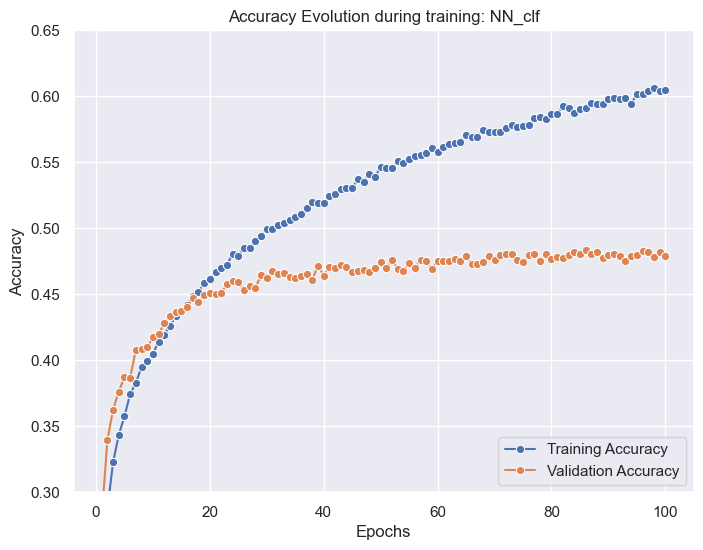

In [27]:
plt.figure(figsize=(8,6))

sns.lineplot(x = x_epochs, y = train_acc, marker = 'o', label = 'Training Accuracy')
sns.lineplot(x = x_epochs, y = val_acc, marker = 'o', label = 'Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Evolution during training: NN_clf')
plt.legend(loc='lower right')#loc='right'
plt.ylim(0,1)
# plt.ylim(0.3,0.5)
plt.ylim(0.3,0.65)
# plt.xlim(0,50)

**train test accuracy**

In [25]:
loss_train, NN_accuracy_train = CNN_clf.evaluate(XX_train, yy_train)
loss_test, NN_accuracy_test = CNN_clf.evaluate(XX_test, yy_test)

# svc_accuracy_train = grid_svc.score(X_train, y_train)
# svc_accuracy_test = grid_svc.score(X_test, y_test)

print("Train set accuracy = %0.3f and loss function = %0.2f" %(NN_accuracy_train, loss_train) )
print("Test  set accuracy = %0.3f and loss function = %0.2f" %(NN_accuracy_test, loss_test))

531/531 [==============================] - 5s 9ms/step - loss: 1.7919 - accuracy: 0.4819
Train set accuracy = 0.793 and loss function = 0.87
Test  set accuracy = 0.482 and loss function = 1.79


**predictions**

In [28]:
t0 = time.time()

yy_pred_vectors = CNN_clf.predict(XX_test)

t1 = time.time()
print("Predictions done in %0.2f seconds" %(t1-t0))

## reverse One-hot-encoding
y_pred_class = yy_pred_vectors.argmax(axis = 1)
y_test_class = yy_test.argmax(axis = 1)

## reverse label encoder
y_pred = target_encoder.inverse_transform(y_pred_class)
y_test_prdCode = target_encoder.inverse_transform(y_test_class)   # should be equal to y_test


531/531 [==============================] - 5s 9ms/step
Predictions done in 7.62 seconds


In [29]:
print(y_test_prdCode)
# print(y_test.values)

[1140 1320 2582 ... 2280 2522 1920]


In [30]:
categories = product_class['prdtypecode'].tolist()

y_pred_cat = pd.Categorical(y_pred, categories = categories)
y_test_cat = pd.Categorical(y_test_prdCode, categories = categories)

cm = pd.crosstab(y_test_cat, y_pred_cat, rownames=['Reality'], colnames=['Predictions'], dropna = False)

(27, 27)


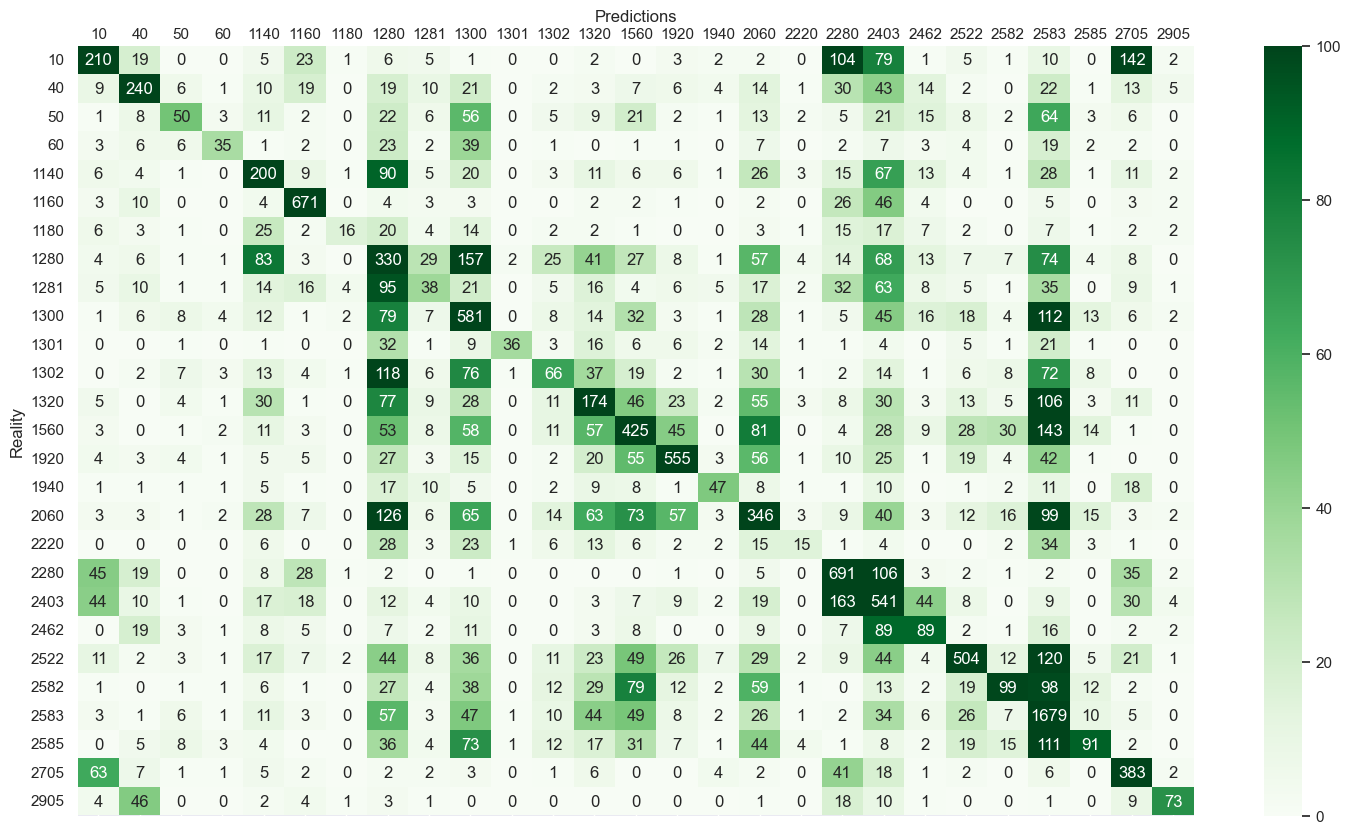

In [31]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')

**Save confusion matrix**

In [45]:
export = True

if export:
    filename = base_img_path + model_date_time + '_img_CCNN' + '_confusionMatrix.csv'
    
    cm.to_csv(filename, header = True, index = True)
    print(filename)

../Base_models/Image/2308191957_img_CCNN_confusionMatrix.csv


**Classification Report: macro & micro**

In [32]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test_prdCode, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_CNN = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_CNN = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

In [38]:
cr_CNN_txt = classification_report(y_test_prdCode, y_pred)
print(cr_CNN_txt)

              precision    recall  f1-score   support

          10       0.48      0.34      0.40       623
          40       0.56      0.48      0.52       502
          50       0.43      0.15      0.22       336
          60       0.56      0.21      0.31       166
        1140       0.37      0.37      0.37       534
        1160       0.80      0.85      0.82       791
        1180       0.55      0.10      0.18       153
        1280       0.24      0.34      0.28       974
        1281       0.21      0.09      0.13       414
        1300       0.41      0.58      0.48      1009
        1301       0.86      0.22      0.35       161
        1302       0.31      0.13      0.19       498
        1320       0.28      0.27      0.28       648
        1560       0.44      0.42      0.43      1015
        1920       0.70      0.64      0.67       861
        1940       0.51      0.29      0.37       161
        2060       0.36      0.35      0.35       999
        2220       0.32    

**Top Classified Categories**

In [57]:
micro_CNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   prdtypecode  27 non-null     object 
 1   precision    27 non-null     float64
 2   recall       27 non-null     float64
 3   f1-score     27 non-null     float64
 4   support      27 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [39]:
micro_CNN.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
5,1160,0.801673,0.848293,0.824324,791.0
23,2583,0.569925,0.822233,0.673216,2042.0
14,1920,0.702532,0.644599,0.672320,861.0
18,2280,0.568257,0.725840,0.637454,952.0
25,2705,0.528276,0.693841,0.599843,552.0


**Worst Classified Categories**

In [40]:
micro_CNN.sort_values(by = 'f1-score', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
8,1281,0.207650,0.091787,0.127303,414.0
17,2220,0.319149,0.090909,0.141509,165.0
6,1180,0.551724,0.104575,0.175824,153.0
11,1302,0.311321,0.132530,0.185915,498.0
2,50,0.431034,0.148810,0.221239,336.0


**Less represented categories scores**

In [41]:
micro_CNN.sort_values(by = 'support', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.551724,0.104575,0.175824,153.0
10,1301,0.857143,0.223602,0.354680,161.0
15,1940,0.505376,0.291925,0.370079,161.0
17,2220,0.319149,0.090909,0.141509,165.0
3,60,0.555556,0.210843,0.305677,166.0


**Save Classification Report**

In [47]:
export = True

if export:
    fm.save_model_metrics(cr_CNN_txt, metric_type = 'classificationReport_txt', 
                                   model_name = 'img_CCNN', 
                                   path = base_img_path , 
                                   timestamp = model_date_time )

    fm.save_model_metrics(micro_CNN, metric_type = 'classificationReport_df', 
                                   model_name = 'img_CCNN_micro', 
                                   path = base_img_path , 
                                   timestamp = model_date_time )

    fm.save_model_metrics(macro_CNN, metric_type = 'classificationReport_df', 
                                   model_name = 'img_CCNN_macro', 
                                   path = base_img_path , 
                                   timestamp = model_date_time )

../Base_models/Image/2308191957_img_CCNN_classificationReport.txt
../Base_models/Image/2308191957_img_CCNN_micro_classificationReport.csv
../Base_models/Image/2308191957_img_CCNN_macro_classificationReport.csv


In [ ]:
# import json

# # Serialize data into file:
# json.dump( data, open( "file_name.json", 'w' ) )

# # Read data from file:
# data = json.load( open( "file_name.json" ) )

In [110]:
# export = True

# if export:
#     filename = training_path + model_date_time +'_img_CCNN' + '_classificationReport.txt'
    
#     with open(filename, 'w') as file:
#         file.write(classification_report(y_test_prdCode, y_pred))
#         print(filename)

../Trained_models_and_metrics/2308162134_img_CCNN_classificationReport.txt


**graphical representatino of classification report**

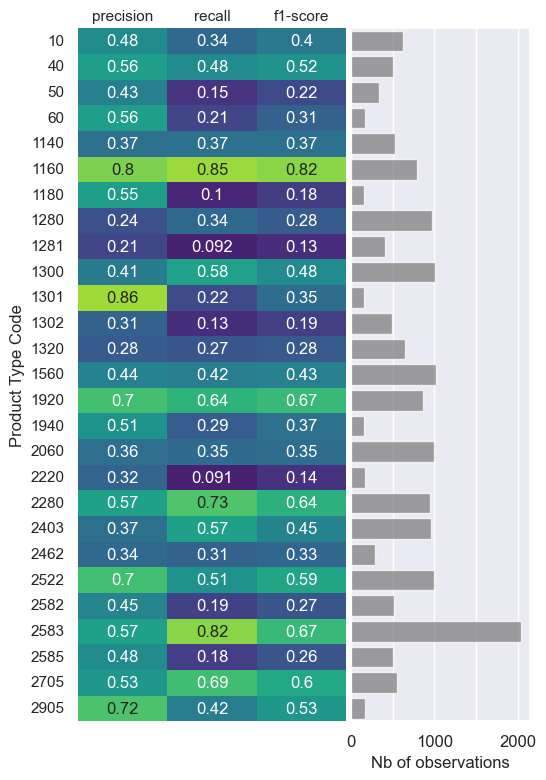

In [48]:
totN = micro_CNN['support'].sum()
totN

art = sns.color_palette()

# micro_rf.to_numpy()
fig, axs = plt.subplots(1,2,figsize = (5.833,9),gridspec_kw={'width_ratios': [3.0, 2.0]})

sns.heatmap(micro_CNN.set_index('prdtypecode')[['precision', 'recall', 'f1-score']], annot = True, cmap='viridis', 
            vmin = 0, vmax = 1, ax = axs[0], cbar = False)
sns.barplot(data = micro_CNN, x = 'support', y='prdtypecode', color = 'grey', alpha = 0.75, ax = axs[1])
# sns.barplot(micro_rf.sort_values(by = 'f1-score', ascending=False).head(5),
#             x = 'support', y='prdtypecode', color = art[1], alpha = 0.75, ax = axs[1])


axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_tick_params(length = 0)
axs[0].xaxis.set_label_position('top')
axs[0].set_ylabel('Product Type Code')

axs[1].set_xticks([0,500,1000,1500,2000])
axs[1].set_xticklabels([0,'',1000,'',2000], fontsize=12)
axs[1].yaxis.set_tick_params(labelleft=False)
axs[1].set_ylabel('')
axs[1].set_xlabel('Nb of observations')

plt.subplots_adjust(wspace=0.02, hspace=0);


**Save / Load trained model ready to use**

In [49]:
save = True
reload = False


if save:
    model_filename = training_path + model_date_time +'_img_CCNN_trained' + '.keras'
    
    CNN_clf.save(model_filename)
    print("Trained model saved:", model_filename)
    

if reload:
    saved_model = '../Trained_models_and_metrics/2308191608_img_CCNN_trained.keras'
    
    from tensorflow.keras.models import load_model
    CNN_clf_reload = load_model(saved_model)
    print("Trained model reloaded: ", saved_model)

Trained model saved: ../Trained_models_and_metrics/2308191957_img_CCNN_trained.keras


In [154]:
r_loss_test, r_NN_accuracy_test = CNN_clf_reload.evaluate(XX_test[:100,:], yy_test[:100,:])

r_loss_test, r_NN_accuracy_test

4/4 [==============================] - 0s 8ms/step - loss: 1.7323 - accuracy: 0.4900


(1.732276439666748, 0.49000000953674316)

### Parameter tunning

**My grid search**

In [45]:
def my_grid_search(params, X_train, y_train, X_test, y_test, img_shape, Nepoch = 200, batch_sz = 200):
    
    '''
    params : d1_unit, d1_act
    '''
    
    ## build model
    Nb_features = X_train.shape[1]
    Nb_classes = y_train.shape[1]
    
    param_trained = []
    train_histories = []
    
    acc_train = []
    acc_test = []

    losses_train = []
    losses_test = []

    
    for l1_filter in params['l1_filter']:
        for l1_kernel in params['l1_kernel']:
            for l1_act in params['l1_act']:
                for l3_rate in params['l3_rate']:
                    for l5_units in params['l5_units']:
                        for l5_act in params['l5_act']:
            
                            param_trained.append( (l1_filter, l1_kernel, l1_act, l3_rate, l5_units, l5_act) ) 
                            CNN_clf = initialize_model(img_shape, Nb_classes, \
                                                         l1_filters = l1_filter, l1_kernel = l1_kernel, l1_act=l1_act, \
                                                         l3_rate = l3_rate, \
                                                         l5_units = l5_units, l5_act = l5_act)

                            ## train model
                            t0 = time.time()
                            training_history = CNN_clf.fit(X_train, y_train,          
                                             epochs = Nepoch,               
                                             batch_size = batch_sz,          
                                             validation_split = 0.2)
                            
                            t1 = time.time()
                            print("Model total training time %0.2f minutes" %((t1-t0)/60))

                            train_histories.append(training_history)

                            ## train test accuracy
                            loss_train, accuracy_train = CNN_clf.evaluate(X_train, y_train)
                            t2 = time.time()
                            print("Train evaluation time %0.2f minutes" %((t2-t1)/60))

                            loss_test, accuracy_test = CNN_clf.evaluate(X_test, y_test)
                            t3 = time.time()
                            print("Test evaluation time %0.2f minutes" %((t3-t2)/60))

                            
                            losses_train.append(loss_train)
                            losses_test.append(loss_test)

                            acc_train.append(accuracy_train)
                            acc_test.append(accuracy_test)
            
    results = {'param_trained' : param_trained,
               'train_histories' : train_histories,
               'accuracy_train' : acc_train,
               'accuracy_test' : acc_test,
               'loss_train' : losses_train,
               'loss_test' : losses_test}
            

    return results


def initialize_model(img_shape, Nb_classes, \
                     l1_filters = 32, l1_kernel = (5,5), l1_act='relu', \
                     l3_rate = 0.2, \
                     l5_units = 128, l5_act = 'relu'):

    ## instantiate layers

    inputs = Input(shape = img_shape, name = "Input")

    first_layer = Conv2D(filters = l1_filters,
                         kernel_size = l1_kernel,
                         padding = 'valid',
                         activation = l1_act)
    
    second_layer = MaxPooling2D(pool_size = (2, 2))
    third_layer = Dropout(rate = l3_rate)
    fourth_layer = Flatten()
    
    fifth_layer = Dense(units = l5_units,
                        activation = l5_act)
    
    output_layer = Dense(units = Nb_classes,
                         activation='softmax')



    ## link layers & model

    x=first_layer(inputs)
    x=second_layer(x)
    x=third_layer(x)
    x=fourth_layer(x)
    x=fifth_layer(x)
    outputs=output_layer(x)

    CNN_clf = Model(inputs = inputs, outputs = outputs)

    
    ## compile
    CNN_clf.compile(loss='categorical_crossentropy',
              optimizer='adam',                
              metrics=['accuracy'])
    
    return CNN_clf


In [44]:
t0 = time.time()

parameters = {'l1_filter' : [32],
              'l1_kernel' : [(3,3), (5,5)],
              'l1_act' : ['relu'],
              'l3_rate' : [0.4],
              'l5_units' : [256],
              'l5_act' : ['relu']}

#X_train =X_train, y_train = yy_train, X_test = X_test, y_test=yy_test
#X_train, yy_train, X_test, yy_test
grid_results = my_grid_search(params = parameters, 
                              X_train = XX_train, y_train = yy_train, 
                              X_test = XX_test, y_test = yy_test,
                              img_shape = (N_px, N_px, N_ch), Nepoch = 25, batch_sz = 400)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

Epoch 1/25
136/136 [==============================] - 153s 1s/step - loss: 3.4937 - accuracy: 0.2254 - val_loss: 2.4100 - val_accuracy: 0.3288
Epoch 2/25
136/136 [==============================] - 119s 877ms/step - loss: 2.2333 - accuracy: 0.3730 - val_loss: 2.2375 - val_accuracy: 0.3732
Epoch 3/25
136/136 [==============================] - 118s 866ms/step - loss: 1.9896 - accuracy: 0.4333 - val_loss: 2.1659 - val_accuracy: 0.3865
Epoch 4/25
136/136 [==============================] - 119s 872ms/step - loss: 1.8028 - accuracy: 0.4818 - val_loss: 2.1471 - val_accuracy: 0.3974
Epoch 5/25
136/136 [==============================] - 119s 877ms/step - loss: 1.6302 - accuracy: 0.5277 - val_loss: 2.1423 - val_accuracy: 0.4058
Epoch 6/25
136/136 [==============================] - 117s 858ms/step - loss: 1.4736 - accuracy: 0.5698 - val_loss: 2.1611 - val_accuracy: 0.4105
Epoch 7/25
136/136 [==============================] - 117s 859ms/step - loss: 1.3390 - accuracy: 0.6101 - val_loss: 2.2037 - va

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

**train test accuracy**

In [ ]:
d1_units = [ item[0] for item in grid_results['param_trained']]
d1_act = [ item[1] for item in grid_results['param_trained']]
accuracy_train = grid_results['accuracy_train']
accuracy_test = grid_results['accuracy_test']

In [ ]:
sns.lineplot(x = d1_units, y = accuracy_test, marker = 'o')

**Learning curve**

In [ ]:
grid_results['train_histories']

In [ ]:
Nepoch = 200
x_epochs = np.arange(1,Nepoch,1)
training_history = grid_results['train_histories']

In [ ]:
plt.figure(figsize=(10,8))

for i in range(len(training_history)):
    
    train_acc_hist = training_history[i].history['accuracy']
    val_acc_hist = training_history[i].history['val_accuracy']
    hist_params = str(grid_results['param_trained'][i])
    
    color =  sns.color_palette()[i]
    sns.lineplot(x = x_epochs, y = train_acc_hist, color = color, ls = ':', label = 'Training Accuracy - ' + hist_params)
    sns.lineplot(x = x_epochs, y = val_acc_hist, color = color, marker = 'o', label = 'Validation Accuracy - ' + hist_params)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Evolution during training: NN_clf')
plt.legend()#

### Barplot - Accuracy comparison

In [3]:
base_models = {'models'     : ['RF', 'SVC', 'NN', 'FUSION'],
               'train_acc'  : [0.995, 0.461, 0.784, 0.937],
               'test_acc'   : [0.448, 0.381, 0.479, 0.808],
               'train_time' : [332.44, 18318.3, 3074.15, 3133.75],  # seconds
               'predict_time' : [2.21, 13971.66, 6.42, 10.59]}  # seconds

img_models_df = pd.DataFrame(base_models)

img_models_df['model_id'] = img_models_df.index + 1

img_models_df

,models,train_acc,test_acc,train_time,predict_time,model_id
0,RF,0.995,0.448,332.44,2.21,1
1,SVC,0.461,0.381,18318.30,13971.66,2
2,NN,0.784,0.479,3074.15,6.42,3
3,FUSION,0.937,0.808,3133.75,10.59,4


In [4]:
# fusion_model = {'models'     : ['FUSION'],
#                'train_acc'  : [0.937],
#                'test_acc'   : [0.808],
#                'train_time' : [3133.75],  # seconds 7 + 52.6 + 3074.15
#                'predict_time' : [10.59]}  # seconds 2 + 2.17 + 6.42

# fusion_df = pd.DataFrame(fusion_model)

# fusion_df['model_id'] = fusion_df.index + 4

# fusion_df

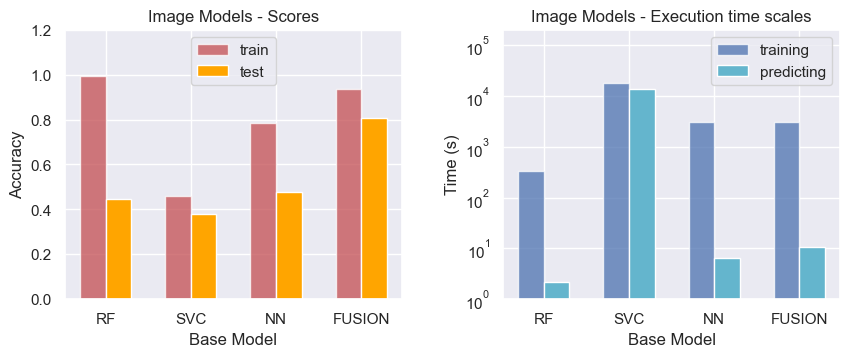

In [24]:
sns.set()
art = sns.color_palette()

barWidth = 0.3
x0 = range(1,5)
x1 = [ x - 0.5*barWidth for x in x0 ]
x2 = [ x + 0.5*barWidth for x in x0 ]

fig, axs = plt.subplots(1,2,figsize=(10,3.5), )

axs[0].bar(x1, img_models_df['train_acc'], width = barWidth, label='train', color = art[3], alpha = 0.75)
axs[0].bar(x2, img_models_df['test_acc'], width = barWidth, label='test', color = 'orange')
# axs[0].bar([4 - 0.5*barWidth], fusion_df['train_acc'], width = barWidth)
# axs[0].bar([4 + 0.5*barWidth], fusion_df['test_acc'], width = barWidth)


axs[0].set_ylabel("Accuracy")
axs[0].set_ylim(0,1.2)
axs[0].legend(loc = 'upper center')
axs[0].set_title("Image Models - Scores")


axs[1].bar(x1, img_models_df['train_time'], width = barWidth, label='training', color = art[0], alpha = 0.75)
axs[1].bar(x2, img_models_df['predict_time'], width = barWidth, label='predicting', color = art[9])

axs[1].set_ylabel("Time (s)")
axs[1].set_yscale('log')
axs[1].set_ylim(1,2e5)
axs[1].legend(loc = 'upper right')
axs[1].set_title("Image Models - Execution time scale")

for ax in axs:
    ax.set_xlabel("Base Model")
    ax.set_xticks(ticks= [1,2,3,4], labels=img_models_df['models'])

plt.subplots_adjust(wspace=0.3, hspace=0)
plt.show()

### Difference between NN and svc
In classification report, blue means improvement while red means degradation.

Improvements (Blue) or detriments (Red) in NN-model with respect to svc-model


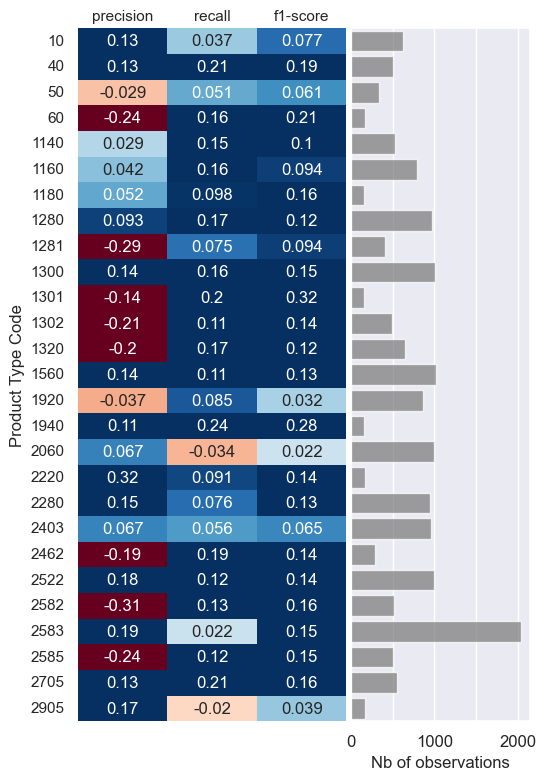

In [67]:
import BaseModel_tools as bm

print("Improvements (Blue) or detriments (Red) in NN-model with respect to svc-model")
bm.classification_reports_difference(micro_CNN, micro_svc)

### Difference between NN and rf
In classification report, blue means improvement while red means degradation.

Improvements (Blue) or detriments (Red) in NN-model with respect to rf-model


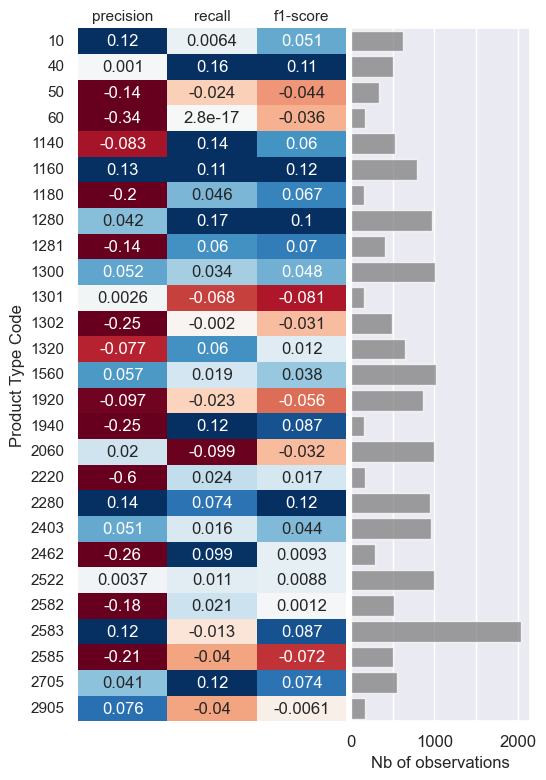

In [68]:
import BaseModel_tools as bm

print("Improvements (Blue) or detriments (Red) in NN-model with respect to rf-model")
bm.classification_reports_difference(micro_CNN, micro_rf)